In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

Read Data

In [11]:
df = pd.read_csv("Housing.csv")

In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Preporcessing

### 1. Data Understanding

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
#change the location of the price column to make the target the last column
cols = df.columns.tolist()
cols

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [15]:
cols.pop(0)
cols.append('price')
cols

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'price']

In [16]:
df = df[cols]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


### 2. Check for data types

In [17]:
df.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

In [18]:
#convert types to dataframe 
pd.DataFrame(df.dtypes).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64


In [19]:
df.nunique()

area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
price               219
dtype: int64

In [20]:
#we do this to distiunquish continous data from discrete data 
#-> law 3adad el unqiue olayel -> catogorical aka discrete , law kteer -> numerical aka continous 
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"dtypes" : dtypes , "n_unique" : n_unique}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
dtypes,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64
n_unique,284,6,4,4,2,2,2,2,2,4,2,3,219


In [21]:
cat_cols = "bedrooms bathrooms stories mainroad guestroom basement hotwaterheating airconditioning parking prefarea furnishingstatus".split()
cat_cols

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [22]:
df[cat_cols] = df[cat_cols].astype("category")

In [23]:
pd.DataFrame({"dtypes" : dtypes , "n_unique" : n_unique}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
dtypes,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,int64
n_unique,284,6,4,4,2,2,2,2,2,4,2,3,219


### 3.Check for Null values

In [24]:
null = df.isnull().sum()
pd.DataFrame({"Null Sum": null}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Null Sum,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
null_ratio = null / df.shape[0]
pd.DataFrame({"Null" : null , "Null_ratio": null_ratio}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.Check for Outliers

In [26]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['area', 'price'], dtype='object')

<AxesSubplot:xlabel='area'>

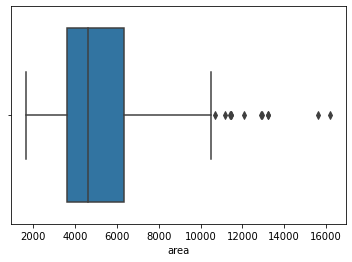

In [27]:
sns.boxplot(df["area"]) 

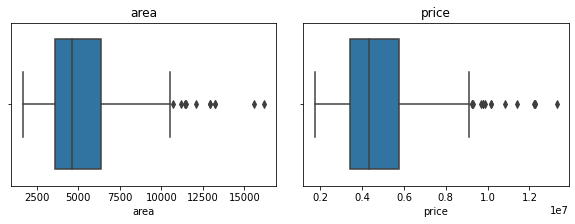

In [28]:
plt.figure(figsize=(10 , 3))
for i , col in enumerate (num_cols) : 
    plt.subplot(1,2 , i+1) # here we should be sure that the number specified in first and second args can hold the number of plots i wanna make 
    sns.boxplot(df[col])
    plt.title(col)
    #plt.show()
plt.subplots_adjust(hspace = 0.1 , wspace = 0.1)
plt.show()

In [29]:
cat_cols = df.select_dtypes("category").columns
len(cat_cols)

11

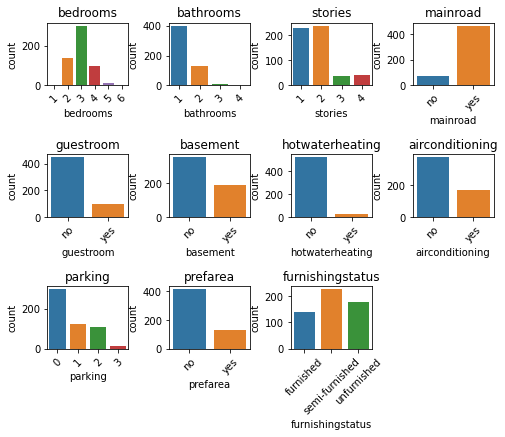

In [30]:
plt.figure(figsize=(8 , 6))
for i , col in enumerate (cat_cols) : 
    plt.subplot(3,4 , i+1) # here we should be sure that the number specified in first and second args can hold the number of plots i wanna make 
    sns.countplot(x = col , data = df)
    plt.title(col)
    plt.xticks(rotation=45)
    #plt.show()
plt.subplots_adjust(hspace = 1.1 , wspace = 0.5)
plt.show()

In [31]:
#remove columns from one column
#Q3
#Q1 '@IQR=Q3-Q1
#upper = Q3 +1.5IQR
#lower Q1- 1.fIQR

### Handle outliers

In [32]:
Q1 = df["area"].quantile(.25)
Q3 = df["area"].quantile(.75)
IQR = Q3 - Q1 
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

In [33]:
df['area'] < Lower

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: area, Length: 545, dtype: bool

In [34]:
#using condition to filter out based on it
df[df['area'] < Lower]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price


In [35]:
df[df['area'] < Upper]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [36]:
df[df['area'] < Upper]["area"]

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 530, dtype: int64

In [37]:
Upper_outliers = df[df['area'] > Upper ]["area"].values

In [38]:
df[df['area'] > Upper ]["area"].index

Int64Index([7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403], dtype='int64')

In [39]:
#replacing outliers with upper value 
df["area"].replace(Upper_outliers , Upper , inplace= True)


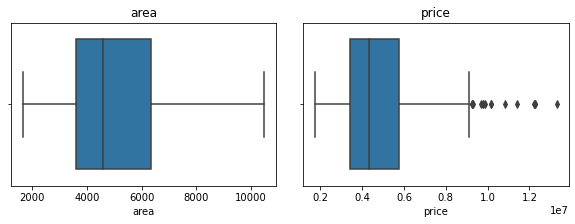

In [40]:
plt.figure(figsize=(10 , 3))
for i , col in enumerate (num_cols) : 
    plt.subplot(1,2 , i+1) # here we should be sure that the number specified in first and second args can hold the number of plots i wanna make 
    sns.boxplot(df[col])
    plt.title(col)
    #plt.show()
plt.subplots_adjust(hspace = 0.1 , wspace = 0.1)
plt.show()

### We cant replace outliers in the target, so we can either drop these rows or keep them and let the model be able to predict them 


In [41]:
#We can then create a for loop to remoc=ve all outliers as follows: 
num_cols = df.select_dtypes("number")."columns 
###KAMMELEEHA MENEL SOORA
    

SyntaxError: EOL while scanning string literal (<ipython-input-41-8224a38521d7>, line 2)

### 5. Visualization

- Relation between numerical features & target 

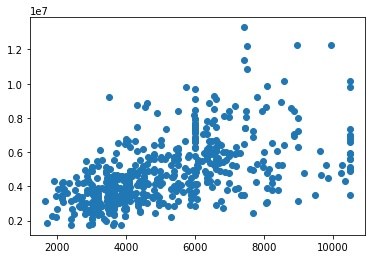

In [42]:
plt.scatter(df['area'] , df['price'])
plt.show()

- Relation between categorical features & target 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

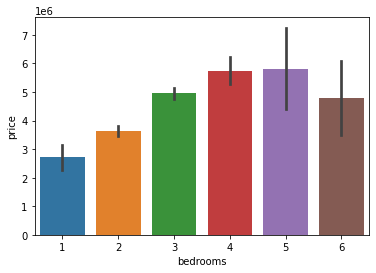

In [43]:
#if price increases/decreases as Nbedrooms increases -> theres a relation between them, 3'eir keda mafeesh 3laqa  
sns.barplot(x="bedrooms", y = "price" , data = df)

<function matplotlib.pyplot.show(close=None, block=None)>

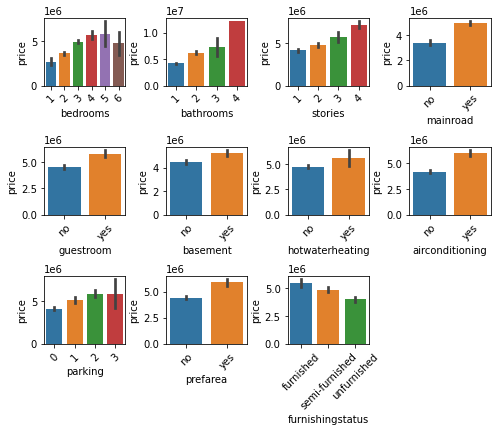

In [44]:
plt.figure(figsize= (8, 6))
for i , col in enumerate(cat_cols) : 
    plt.subplot(3,4,i+1)
    sns.barplot(x=col , y = "price" , data = df)
    plt.xticks(rotation = 45) 
    #plt.title(col)
plt.subplots_adjust(hspace = 0.9 , wspace= .5)
plt.show

### P.S Too much features cause overfitting, so if im confident theres no relation between the target and feature, drop the feature

- Check for Variation of numerical cols 

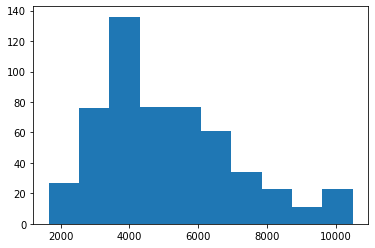

In [45]:
#there is varition 3ashan el hostogram wide, w law kanet values kol area a3la 3al histogram (more Y), ekeda means more variation 
plt.hist(df["area"])
plt.show()

- check for variation in categoricak columms

<function matplotlib.pyplot.show(close=None, block=None)>

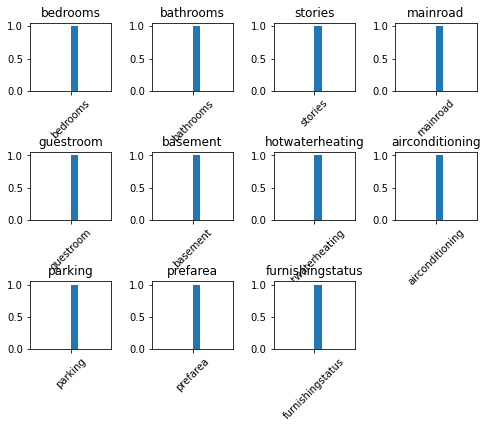

In [48]:
plt.figure(figsize= (8, 6))
for i , col in enumerate(cat_cols) : 
    plt.subplot(3,4,i+1)
    plt.hist(col) 
    plt.xticks(rotation = 45) 
    plt.title(col)
plt.subplots_adjust(hspace = 0.9 , wspace= .5)
plt.show


### 6. Check for duplicates

In [49]:
df.duplicated().sum()
#df.drop_duplicates(inplace=True) #commented bas 3ashan mafeesh duplocates

0

### 7. Data splitting

In [50]:
X = df.iloc[: , :-1]
Y = df.iloc[: , -1:] #ba3mel el slicing da fl y baddal "-1" 3ashan yesheel el Y ka Df msh series 



### 8. Normaization

In [51]:
num_cols= X.select_dtypes("number").columns

In [52]:
from sklearn.preprocessing import MinMaxScaler
#fit and transform fintions couold be merged into one function called fit_transforrm or can be used seperately
scaler = MinMaxScaler() #istantiate an object of minmaxscaler
X[num_cols] = scaler.fit_transform(X[num_cols]) #va3mel fit w trasnform using el object scaler 3ala kol el numeric columsn 

### 9. Encoding

In [53]:
!pip install category_encoders

In [54]:
df[cat_cols]

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


In [55]:
ordinal_cols = "bedrooms bathrooms stories mainroad guestroom basement hotwaterheating airconditioning parking prefarea ".split()
ordinal_cols

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea']

In [56]:
import category_encoders

In [57]:
from category_encoders import OrdinalEncoder
#baddeeh el columns el ordinal beta3tee
#fit bete7seb 
#transform betnaffez ba2a 
encoder = OrdinalEncoder(cols = ordinal_cols)
X = encoder.fit_transform(X)

In [58]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.651977,1,1,1,1,1,1,1,1,1,1,furnished
1,0.825989,1,2,2,1,1,1,1,1,2,2,furnished
2,0.938983,2,1,3,1,1,2,1,2,1,1,semi-furnished
3,0.661017,1,1,3,1,1,2,1,1,2,1,furnished
4,0.651977,1,3,3,1,2,2,1,1,1,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,4,3,4,1,1,2,1,2,1,2,unfurnished
541,0.084746,2,3,4,2,1,1,1,2,3,2,semi-furnished
542,0.222599,4,3,4,1,1,1,1,2,3,2,unfurnished
543,0.142373,2,3,4,2,1,1,1,2,3,2,furnished


N.B
1. seaborn is built on matplotlib 
2. sklearn is built on pandas and numpy

In [59]:
X.furnishingstatus.nunique()

3

In [60]:
#I have to reassign the mapped datat to the column "furninshing_status"
X["furnishingstatus"] = X.furnishingstatus.map({"furnished":3 , "semi-furnished":2 , "unfurnished": 1})
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.651977,1,1,1,1,1,1,1,1,1,1,3
1,0.825989,1,2,2,1,1,1,1,1,2,2,3
2,0.938983,2,1,3,1,1,2,1,2,1,1,2
3,0.661017,1,1,3,1,1,2,1,1,2,1,3
4,0.651977,1,3,3,1,2,2,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,4,3,4,1,1,2,1,2,1,2,1
541,0.084746,2,3,4,2,1,1,1,2,3,2,2
542,0.222599,4,3,4,1,1,1,1,2,3,2,1
543,0.142373,2,3,4,2,1,1,1,2,3,2,3


### 10. Modelling

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [63]:
pred = model.predict(X)
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(Y,pred)    

839234.9051992706

In [64]:
from sklearn.metrics import r2_score 
r2_score(Y, pred)

0.6121759994689939